In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [4]:
from sklearn.datasets import load_boston

In [5]:
boston = load_boston()

In [6]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

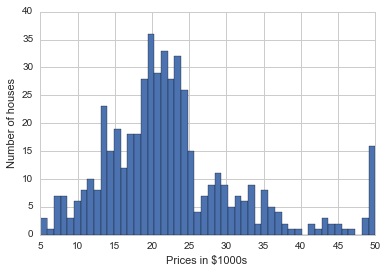

In [9]:
plt.hist(boston.target,bins = 50)
plt.xlabel('Prices in $1000s ')
plt.ylabel('Number of houses')

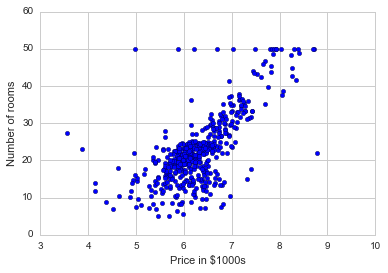

In [12]:
plt.scatter(boston.data[:,5], boston.target)
plt.xlabel("Price in $1000s")
plt.ylabel("Number of rooms")

In [13]:
bostonDf = DataFrame(boston.data)
bostonDf.columns = boston.feature_names

In [14]:
bostonDf.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [16]:
bostonDf['Price'] = boston.target
bostonDf.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


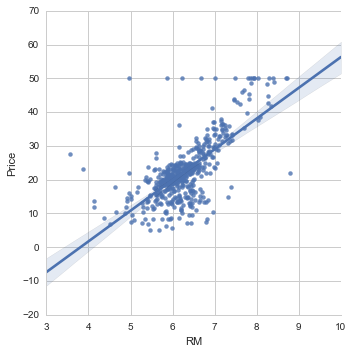

In [17]:
sns.lmplot('RM','Price',data = bostonDf)

In [24]:
X = bostonDf.RM
type(X)

array([ 6.575,  6.421,  7.185,  6.998,  7.147,  6.43 ,  6.012,  6.172,
        5.631,  6.004,  6.377,  6.009,  5.889,  5.949,  6.096,  5.834,
        5.935,  5.99 ,  5.456,  5.727,  5.57 ,  5.965,  6.142,  5.813,
        5.924,  5.599,  5.813,  6.047,  6.495,  6.674,  5.713,  6.072,
        5.95 ,  5.701,  6.096,  5.933,  5.841,  5.85 ,  5.966,  6.595,
        7.024,  6.77 ,  6.169,  6.211,  6.069,  5.682,  5.786,  6.03 ,
        5.399,  5.602,  5.963,  6.115,  6.511,  5.998,  5.888,  7.249,
        6.383,  6.816,  6.145,  5.927,  5.741,  5.966,  6.456,  6.762,
        7.104,  6.29 ,  5.787,  5.878,  5.594,  5.885,  6.417,  5.961,
        6.065,  6.245,  6.273,  6.286,  6.279,  6.14 ,  6.232,  5.874,
        6.727,  6.619,  6.302,  6.167,  6.389,  6.63 ,  6.015,  6.121,
        7.007,  7.079,  6.417,  6.405,  6.442,  6.211,  6.249,  6.625,
        6.163,  8.069,  7.82 ,  7.416,  6.727,  6.781,  6.405,  6.137,
        6.167,  5.851,  5.836,  6.127,  6.474,  6.229,  6.195,  6.715,
      

In [55]:
X = np.vstack(bostonDf.RM)
X.shape

(506, 1)

In [56]:
Y = bostonDf.Price

In [57]:
X

array([[ 6.575],
       [ 6.421],
       [ 7.185],
       [ 6.998],
       [ 7.147],
       [ 6.43 ],
       [ 6.012],
       [ 6.172],
       [ 5.631],
       [ 6.004],
       [ 6.377],
       [ 6.009],
       [ 5.889],
       [ 5.949],
       [ 6.096],
       [ 5.834],
       [ 5.935],
       [ 5.99 ],
       [ 5.456],
       [ 5.727],
       [ 5.57 ],
       [ 5.965],
       [ 6.142],
       [ 5.813],
       [ 5.924],
       [ 5.599],
       [ 5.813],
       [ 6.047],
       [ 6.495],
       [ 6.674],
       [ 5.713],
       [ 6.072],
       [ 5.95 ],
       [ 5.701],
       [ 6.096],
       [ 5.933],
       [ 5.841],
       [ 5.85 ],
       [ 5.966],
       [ 6.595],
       [ 7.024],
       [ 6.77 ],
       [ 6.169],
       [ 6.211],
       [ 6.069],
       [ 5.682],
       [ 5.786],
       [ 6.03 ],
       [ 5.399],
       [ 5.602],
       [ 5.963],
       [ 6.115],
       [ 6.511],
       [ 5.998],
       [ 5.888],
       [ 7.249],
       [ 6.383],
       [ 6.816],
       [ 6.145

In [58]:
#[X, 1]
X = np.array([[value, 1] for value in X])

In [59]:
X

array([[array([ 6.575]), 1],
       [array([ 6.421]), 1],
       [array([ 7.185]), 1],
       ..., 
       [array([ 6.976]), 1],
       [array([ 6.794]), 1],
       [array([ 6.03]), 1]], dtype=object)

In [81]:
aa = np.array([[1,2],[2],[3]])
aa

array([[1, 2], [2], [3]], dtype=object)

In [83]:
aa[0][1]

2

In [86]:
np.linalg.lstsq(X,Y)

(array([  9.10210898, -34.67062078]),
 array([ 22061.87919621]),
 2,
 array([ 143.99484122,    2.46656609]))

In [87]:
np.linalg.lstsq(X,Y)[0]

array([  9.10210898, -34.67062078])

In [92]:
m, b = np.linalg.lstsq(X,Y)[0]

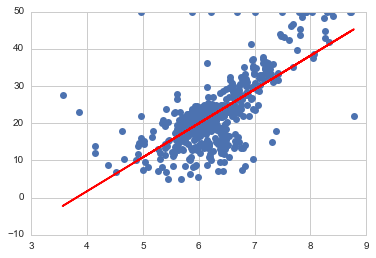

In [93]:
plt.plot(bostonDf.RM, bostonDf.Price, 'o')
x  = bostonDf.RM
plt.plot(x, m*x + b, 'r',label = 'Best Fit Line')

In [94]:
result = np.linalg.lstsq(X,Y)

In [101]:
error_total = result[1]
rmse = np.sqrt(error_total/len(X))
print 'the root square mean error is %.2f' %rmse
rmse

the root square mean error is 6.60


array([ 6.60307139])

In [103]:
import sklearn
from sklearn.linear_model import LinearRegression

In [104]:
lreg = LinearRegression()

In [111]:
X_multi = bostonDf.drop('Price',1)
X_multi.head(10)
Y_target = bostonDf.Price

In [112]:
lreg.fit(X_multi, Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [114]:
print 'The esitmated intercept coefficient is %.2f' %lreg.intercept_
print 'The number of coefficients used was %d' %len(lreg.coef_)

The esitmated intercept coefficient is 36.49
The number of coefficients used was 13


In [126]:
coeffDf = DataFrame(bostonDf.columns)
coeffDf.head(10)

,0
0,CRIM
1,ZN
2,INDUS
3,CHAS
4,NOX
5,RM
6,AGE
7,DIS
8,RAD
9,TAX


In [127]:
coeffDf.columns = ['Features']
coeffDf['Coefficient Estimates'] = Series(lreg.coef_)
coeffDf

,Features,Coefficient Estimates
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


0     -0.107171
1      0.046395
2      0.020860
3      2.688561
4    -17.795759
5      3.804752
6      0.000751
7     -1.475759
8      0.305655
9     -0.012329
10    -0.953464
11     0.009393
12    -0.525467
dtype: float64

In [128]:
X_multi.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [129]:
Y_target.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [130]:
X

array([[array([ 6.575]), 1],
       [array([ 6.421]), 1],
       [array([ 7.185]), 1],
       ..., 
       [array([ 6.976]), 1],
       [array([ 6.794]), 1],
       [array([ 6.03]), 1]], dtype=object)

In [132]:
bostonDf.Price

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, dtype: float64

In [149]:
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, bostonDf.Price)

In [150]:
print X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(379, 2) (127, 2) (379,) (127,)


In [151]:
lreg = LinearRegression()
lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [152]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [153]:
print "Fit a model X_train, and calculate the MSE with Y_train: %.2f" %np.mean((Y_train - pred_train)**2)

Fit a model X_train, and calculate the MSE with Y_train: 42.69


In [154]:
print "Fit a model X_train, and calculate MSE with X_test and Y_test %.2f" %np.mean((Y_test - pred_test)**2)

Fit a model X_train, and calculate MSE with X_test and Y_test 47.19


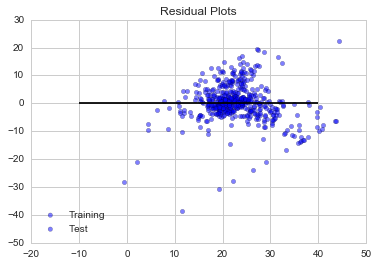

In [157]:
train = plt.scatter(pred_train, (pred_train) - Y_train, alpha = 0.5)
test = plt.scatter(pred_test, (pred_test) - Y_test, alpha = 0.5)

plt.hlines(y = 0, xmin = -10, xmax = 40)
plt.legend((train, test), ('Training','Test'), loc = 'lower left')
plt.title('Residual Plots')